In [46]:
#import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
df=pd.read_csv('Life Expectancy Data.csv')

In [25]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [26]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [27]:
df.shape

(2938, 22)

In [28]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [29]:
# Prepare the data

In [30]:

from sklearn.preprocessing import LabelEncoder

columns = ["Status","Country"]
for feature in columns:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])

Y = df["Life expectancy "]
df = df.drop(["Life expectancy "], axis=1)   

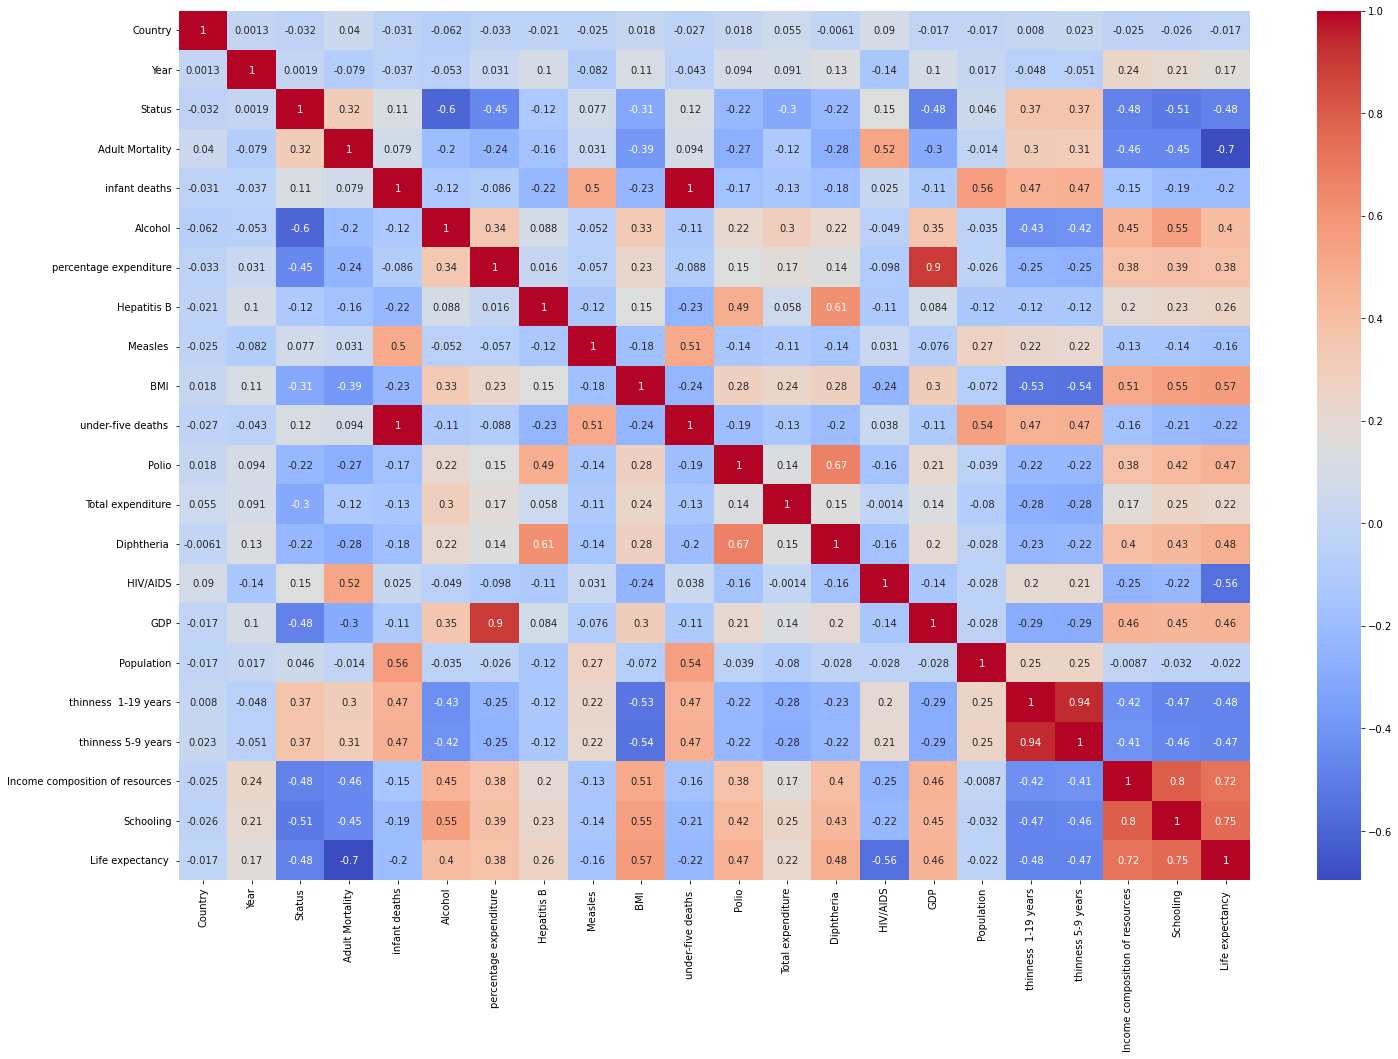

In [31]:
plt.figure(figsize = (24,16))
sns.heatmap(pd.concat([df,Y], axis=1).corr(), annot=True, cmap="coolwarm")

In [32]:
def fillmissing(df, feature, method):
    if method == "mode":
        df[feature] = df[feature].fillna(df[feature].mode()[0])
        
    elif method == "median":
        df[feature] = df[feature].fillna(df[feature].median())
        
    else:
        df[feature] = df[feature].fillna(df[feature].mean())

In [33]:
features_missing= df.columns[df.isna().any()]
for feature in features_missing:
    fillmissing(df, feature= feature, method= "mean")

Y.fillna(Y.median(), inplace=True)

In [34]:
X = df.to_numpy()  # np.matrix(df.to_numpy())
y = Y.to_numpy().transpose()  # np.matrix(Y.to_numpy()).transpose()

m,n = X.shape

In [35]:
repeat = 1000
lrate = 0.001
theta = np.zeros((n+1))

In [36]:
mu = X.mean(0) # 
sigma = X.std(0) 
xn = (X - mu) / sigma
xo = np.hstack((np.ones((m, 1)), xn))

In [37]:
X = df.to_numpy()  # np.matrix(df.to_numpy())
y = Y.to_numpy().transpose()  # np.matrix(Y.to_numpy()).transpose()

m,n = X.shape

In [38]:
def computeCostMulti(X, y, theta):
    m = len(y)  # number of training examples
    diff = np.matmul(X, theta) - y
    J = 1 / (2 * m) * np.matmul(diff, diff)
    return J

In [39]:
def gradientDescent(X, y, theta, alpha, num_iters):
    # Initialize some useful values
    m = len(y)  # number of training examples
    J_history = []

    for i in range(num_iters):
        hc = np.matmul(X, theta) - y
        theta -= alpha / m * np.matmul(X.transpose(), hc)
        # Save the cost J in every iteration
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [40]:
theta, J_history = gradientDescent(xo, y, theta, lrate, repeat)

In [41]:
# Display gradient descent's result
print('Theta computed from gradient descent: ')
print(f' {theta} ')

Theta computed from gradient descent: 
 [ 4.37774286e+01  5.69752324e-02  2.36143632e-01 -6.75881917e-01
 -2.03388982e+00 -1.93780755e-03  3.30705085e-01  3.82661485e-01
  6.03640249e-02 -1.90204582e-01  9.96928337e-01 -1.28694661e-01
  8.46850229e-01  1.36231431e-01  9.13105706e-01 -1.89314066e+00
  5.06850709e-01  2.29220077e-01 -4.36224459e-01 -3.95004367e-01
  1.43099742e+00  1.51397540e+00] 


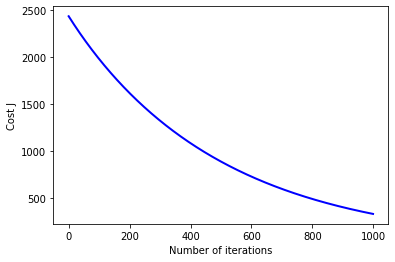

In [42]:
# Plot the convergence graph
plt.plot(np.arange(repeat), J_history, '-b', LineWidth=2)
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [43]:
y_pred = np.matmul(xo, theta)   

In [47]:
# get RMSE error rate
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y, y_pred)))

diff = (y_pred / y * 100)
print('Mean of results: ',diff.mean())
print('Deviation of results: ',diff.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff>=90, diff<=110))[0]) / m * 100)

RMSE:  25.815167121994246
Mean of results:  62.95924797895902
Deviation of results:  6.0041517918583995
Results within 10% support/resistance:  0.03403675970047651


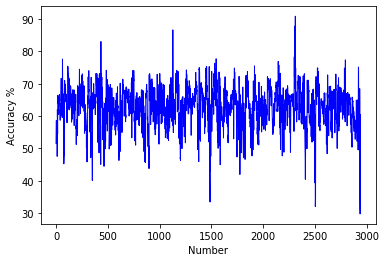

In [48]:
# Plot differences to visualise the differences from 100%
plt.plot(np.arange(m), diff, '-b', LineWidth=1)
plt.xlabel('Number')
plt.ylabel('Accuracy %')
plt.show()

In [53]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

# Instantiate model
lm2 = LinearRegression()

# Fit Model
lm2.fit(X_train, y_train)

# Predict
y_pred2 = lm2.predict(X_test)

# RMSE
print('RMSE: ',np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

# calculate our own accuracy where prediction within 10% is ok
diff2 = (y_pred2 / y_test * 100)
print('Mean of results: ',diff2.mean())
print('Deviation of results: ',diff2.std())
print('Results within 10% support/resistance: ', len(np.where(np.logical_and(diff2>=90, diff2<=110))[0]) / len(y_pred2) * 100)

RMSE:  4.047815022051353
Mean of results:  99.94949120187448
Deviation of results:  6.8160172107299095
Results within 10% support/resistance:  92.17687074829932
